In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Daftar Isi:

* Data Preprocessing
* EDA & Visualisasi
* Kesimpulan
* Saran

## Data Preprocessing

In [2]:
df_customer = pd.read_csv("dataset/Customer.csv")
df_campaign = pd.read_csv("dataset/Marketing Campaign.csv")
df_review_perusahaan = pd.read_csv("dataset/Review Perusahaan.csv")
df_review_produk = pd.read_csv("dataset/Review Produk.csv")
df_transaksi_main = pd.read_csv("dataset/Transaksi Main Product.csv")
df_transaksi_service = pd.read_csv("dataset/Transaksi Service.csv")

In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      55 non-null     object
 1   Domisili  55 non-null     object
 2   Usia      55 non-null     int64 
 3   Gender    55 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.8+ KB


In [4]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        7 non-null      object
 1   Start_Date  7 non-null      object
 2   End_Date    7 non-null      object
 3   Budget      7 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 352.0+ bytes


In [5]:
df_review_perusahaan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    55 non-null     object
 1   Rating  55 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


In [6]:
df_review_produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID_Review  458 non-null    int64  
 1   Review     405 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.3 KB


In [7]:
df_transaksi_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tanggal_Transaksi  458 non-null    object
 1   Nama_Sales         458 non-null    object
 2   Harga_Asli         441 non-null    object
 3   Customer           458 non-null    object
 4   Customer_copy      458 non-null    object
 5   Tipe_Produk        458 non-null    object
 6   ID_Transaksi       458 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 25.2+ KB


In [8]:
df_transaksi_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tanggal_Service  560 non-null    object
 1   Harga_Service    560 non-null    object
 2   Customer         560 non-null    object
 3   Tipe_Jasa        560 non-null    object
 4   ID               560 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 22.0+ KB


In [9]:
df_customer.isna().sum()

Name        0
Domisili    0
Usia        0
Gender      0
dtype: int64

In [10]:
df_campaign.isna().sum()

Name          0
Start_Date    0
End_Date      0
Budget        0
dtype: int64

In [11]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        7 non-null      object
 1   Start_Date  7 non-null      object
 2   End_Date    7 non-null      object
 3   Budget      7 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 352.0+ bytes


In [12]:
df_campaign['Budget'] = df_campaign['Budget'].astype(int)

In [13]:
df_review_perusahaan.isna().sum()

Name      0
Rating    0
dtype: int64

In [14]:
df_campaign['Start_Date'] = df_campaign['Start_Date'].astype('datetime64[ns]')
df_campaign['End_Date'] = df_campaign['End_Date'].astype('datetime64[ns]')

c:\Users\Acer\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '31/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\Acer\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '28/02/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\Acer\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '31/03/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\Acer\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '30/04/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\Acer\anaconda3\lib\site-packages\pandas\core\dtypes

In [15]:
df_review_produk['Review'].isna().sum()

53

In [16]:
df_review_produk['Review'] = df_review_produk['Review'].fillna(df_review_produk['Review'].median())

In [17]:
df_transaksi_main.isna().sum()

Tanggal_Transaksi     0
Nama_Sales            0
Harga_Asli           17
Customer              0
Customer_copy         0
Tipe_Produk           0
ID_Transaksi          0
dtype: int64

In [18]:
df_transaksi_main

,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Customer_copy,Tipe_Produk,ID_Transaksi
0,01/01/2021,Octroy,"Rp88,000.00",Ufuoma,Ufuoma,Produk F,1
1,01/01/2021,Octroy,"Rp405,000.00",Wiati,Wiati,Produk C,2
2,02/01/2021,Aini,"Rp405,000.00",Cuphulien,Cuphulien,Produk A,3
3,02/01/2021,Agus,"Rp170,000.00",Cuphulien,Cuphulien,Produk G,4
4,02/01/2021,Aini,"Rp730,000.00",Nah,Nah,Produk D,5
...,...,...,...,...,...,...,...
453,06/08/2021,Octroy,"Rp407,400.00",Adegoke,Adegoke,Produk A,454
454,06/08/2021,Octroy,"Rp1,930,000.00",Qayug,Qayug,Produk C,455
455,06/08/2021,Aini,"Rp1,031,500.00",Thauzhash,Thauzhash,Produk E,456
456,07/08/2021,Dena,"Rp2,904,000.00",Wevishar,Wevishar,Produk G,457


In [19]:
df_transaksi_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tanggal_Transaksi  458 non-null    object
 1   Nama_Sales         458 non-null    object
 2   Harga_Asli         441 non-null    object
 3   Customer           458 non-null    object
 4   Customer_copy      458 non-null    object
 5   Tipe_Produk        458 non-null    object
 6   ID_Transaksi       458 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 25.2+ KB


In [20]:
df_transaksi_main.loc[df_transaksi_main['Harga_Asli'].isna()]

,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Customer_copy,Tipe_Produk,ID_Transaksi
32,16/01/2021,Octroy,NaN,Bluaxia,Bluaxia,Produk G,33
33,16/01/2021,Aini,NaN,Saazteec,Saazteec,Produk D,34
46,25/01/2021,Octroy,NaN,Okafor,Okafor,Produk G,47
61,03/02/2021,Aini,NaN,Jeingzou,Jeingzou,Produk C,62
86,14/02/2021,Octroy,NaN,Ixoim,Ixoim,Produk G,87
88,17/02/2021,Agus,NaN,Glite,Glite,Produk D,89
127,09/03/2021,Agus,NaN,Jeingzou,Jeingzou,Produk F,128
136,11/03/2021,Dena,NaN,Axzab,Axzab,Produk G,137
164,23/03/2021,Octroy,NaN,Dejen,Dejen,Produk D,165
167,24/03/2021,Aini,NaN,Chi,Chi,Produk G,168


In [21]:
df_transaksi_main['Harga_Asli'] = df_transaksi_main['Harga_Asli'].apply(lambda x: str(x).replace("Rp", "").replace(",", "").replace(".00", "") if isinstance(x, str) else x)

In [22]:
df_transaksi_main['Harga_Asli'] = df_transaksi_main['Harga_Asli'].fillna(df_transaksi_main['Harga_Asli'].median())

In [23]:
df_transaksi_main['Harga_Asli'] = df_transaksi_main['Harga_Asli'].astype(int)

In [24]:
df_transaksi_main['Harga_Asli'].isna().sum()

0

In [25]:
df_transaksi_main

,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Customer_copy,Tipe_Produk,ID_Transaksi
0,01/01/2021,Octroy,88000,Ufuoma,Ufuoma,Produk F,1
1,01/01/2021,Octroy,405000,Wiati,Wiati,Produk C,2
2,02/01/2021,Aini,405000,Cuphulien,Cuphulien,Produk A,3
3,02/01/2021,Agus,170000,Cuphulien,Cuphulien,Produk G,4
4,02/01/2021,Aini,730000,Nah,Nah,Produk D,5
...,...,...,...,...,...,...,...
453,06/08/2021,Octroy,407400,Adegoke,Adegoke,Produk A,454
454,06/08/2021,Octroy,1930000,Qayug,Qayug,Produk C,455
455,06/08/2021,Aini,1031500,Thauzhash,Thauzhash,Produk E,456
456,07/08/2021,Dena,2904000,Wevishar,Wevishar,Produk G,457


In [26]:
df_transaksi_service.isna().sum()

Tanggal_Service    0
Harga_Service      0
Customer           0
Tipe_Jasa          0
ID                 0
dtype: int64

In [27]:
df_transaksi_service['Harga_Service'] = df_transaksi_service['Harga_Service'].apply(lambda x: str(x).replace("Rp", "").replace(",", "").replace(".00", "") if isinstance(x, str) else x)

In [28]:
df_transaksi_service['Harga_Service'] = df_transaksi_service['Harga_Service'].astype(int)

## EDA (Exploratory Data Analysis)

* Berapa total transaksi & revenue produk dari masing-masing customer? (Tampilkan top 4)
* Berapa total transaksi & revenue dari masing-masing kota? (Tampilkan top 4)
* Berapa total revenue bulanan perusahaan? (produk + service)
* Apa produk yang paling disukai berdasarkan Gender?
* Bagaimana demografi customer?
  * Jumlah customer per domisili
  * Rata-rata usia berdasarkan gender per-Domisili
  * Jumlah customer berdasarkan gender per-domisili
* Berapa rata-rata rating yang diberikan dari customer ke perusahaan?
* Berapa jumlah transaksi dan revenue yang didapatkan oleh perusahaan dari main product pada setiap campaign?

#### 1. Berapa total transaksi dan revenue dari masing-masing customer? (Mencari top 5 customer yang paling loyal)

In [29]:
df_transaksi_main

,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Customer_copy,Tipe_Produk,ID_Transaksi
0,01/01/2021,Octroy,88000,Ufuoma,Ufuoma,Produk F,1
1,01/01/2021,Octroy,405000,Wiati,Wiati,Produk C,2
2,02/01/2021,Aini,405000,Cuphulien,Cuphulien,Produk A,3
3,02/01/2021,Agus,170000,Cuphulien,Cuphulien,Produk G,4
4,02/01/2021,Aini,730000,Nah,Nah,Produk D,5
...,...,...,...,...,...,...,...
453,06/08/2021,Octroy,407400,Adegoke,Adegoke,Produk A,454
454,06/08/2021,Octroy,1930000,Qayug,Qayug,Produk C,455
455,06/08/2021,Aini,1031500,Thauzhash,Thauzhash,Produk E,456
456,07/08/2021,Dena,2904000,Wevishar,Wevishar,Produk G,457


In [30]:
# Total transaksi dari masing-masing customer (Top 5)
df_transaksi_main.Customer.value_counts().head()

Bzayan      17
Mygneo      16
Nah         13
Tichaona    13
Ekyboo      12
Name: Customer, dtype: int64

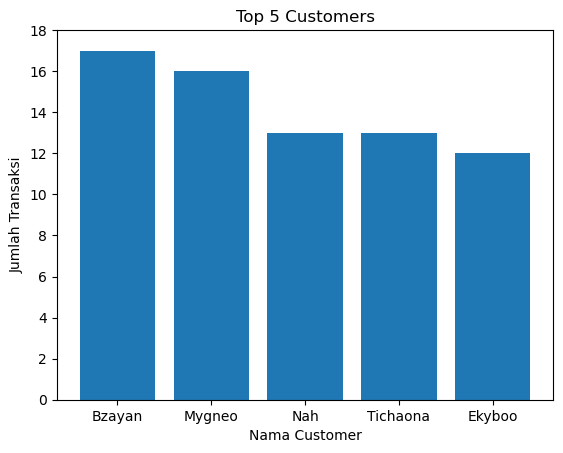

In [31]:
import matplotlib.pyplot as plt

# mengambil 5 data teratas dari kolom 'Customer'
top_customers = df_transaksi_main.Customer.value_counts().head()

# membuat bar chart
plt.bar(top_customers.index, top_customers.values)

# menambahkan judul dan label sumbu
plt.title('Top 5 Customers')
plt.xlabel('Nama Customer')
plt.ylabel('Jumlah Transaksi')
plt.ylim(0, 18)

# menampilkan diagram
plt.show()

In [32]:
# Total revenue dari masing-masing customer (Top 5)
df_transaksi_main.groupby(by='Customer')['Harga_Asli'].sum().sort_values(ascending=False).head()

Customer
Evii      43180000
Taurai    38992000
Mygneo    25063607
Ezii      24336000
Bzayan    23883536
Name: Harga_Asli, dtype: int32

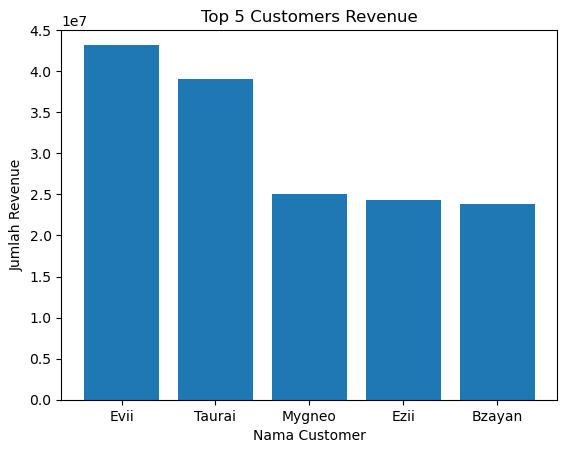

In [33]:
import matplotlib.pyplot as plt

# mengambil 5 data teratas dari kolom 'Customer'
top_customers_revenue = df_transaksi_main.groupby(by='Customer')['Harga_Asli'].sum().sort_values(ascending=False).head()

# membuat bar chart
plt.bar(top_customers_revenue.index, top_customers_revenue.values)

# menambahkan judul dan label sumbu
plt.title('Top 5 Customers Revenue')
plt.xlabel('Nama Customer')
plt.ylabel('Jumlah Revenue')
plt.ylim(0, 45000000)

# menampilkan diagram
plt.show()

#### 2. Berapa total transaksi & revenue dari masing-masing kota? (Tampilkan top 5)

In [34]:
df_customer.head()

,Name,Domisili,Usia,Gender
0,Abdoul,Bali,12,Pria
1,Ade,Jawa Barat,42,Wanita
2,Adegoke,Luar Indonesia,41,Pria
3,Axzab,Jakarta,24,Wanita
4,Bluaxia,Jawa Barat,11,Wanita


In [35]:
df_transaksi_main.head()

,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Customer_copy,Tipe_Produk,ID_Transaksi
0,01/01/2021,Octroy,88000,Ufuoma,Ufuoma,Produk F,1
1,01/01/2021,Octroy,405000,Wiati,Wiati,Produk C,2
2,02/01/2021,Aini,405000,Cuphulien,Cuphulien,Produk A,3
3,02/01/2021,Agus,170000,Cuphulien,Cuphulien,Produk G,4
4,02/01/2021,Aini,730000,Nah,Nah,Produk D,5


In [36]:
transaksi_kota = pd.merge(df_customer, df_transaksi_main, left_on='Name', right_on='Customer', how='right')

In [37]:
transaksi_kota

,Name,Domisili,Usia,Gender,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Customer_copy,Tipe_Produk,ID_Transaksi
0,Ufuoma,Bali,48,Pria,01/01/2021,Octroy,88000,Ufuoma,Ufuoma,Produk F,1
1,Wiati,Jakarta,47,Wanita,01/01/2021,Octroy,405000,Wiati,Wiati,Produk C,2
2,Cuphulien,Jawa Barat,42,Wanita,02/01/2021,Aini,405000,Cuphulien,Cuphulien,Produk A,3
3,Cuphulien,Jawa Barat,42,Wanita,02/01/2021,Agus,170000,Cuphulien,Cuphulien,Produk G,4
4,Nah,Jakarta,23,Wanita,02/01/2021,Aini,730000,Nah,Nah,Produk D,5
...,...,...,...,...,...,...,...,...,...,...,...
453,Adegoke,Luar Indonesia,41,Pria,06/08/2021,Octroy,407400,Adegoke,Adegoke,Produk A,454
454,Qayug,Luar Indonesia,24,Wanita,06/08/2021,Octroy,1930000,Qayug,Qayug,Produk C,455
455,Thauzhash,Bali,45,Wanita,06/08/2021,Aini,1031500,Thauzhash,Thauzhash,Produk E,456
456,Wevishar,Jakarta,41,Wanita,07/08/2021,Dena,2904000,Wevishar,Wevishar,Produk G,457


In [38]:
# Total revenue dari masing-masing kota (Top 4)
transaksi_kota.groupby(by='Domisili')['Harga_Asli'].sum().sort_values(ascending=False).head()

Domisili
Jawa Barat        203480015
Jakarta           168396590
Bali              119182433
Luar Indonesia    106920811
Name: Harga_Asli, dtype: int32

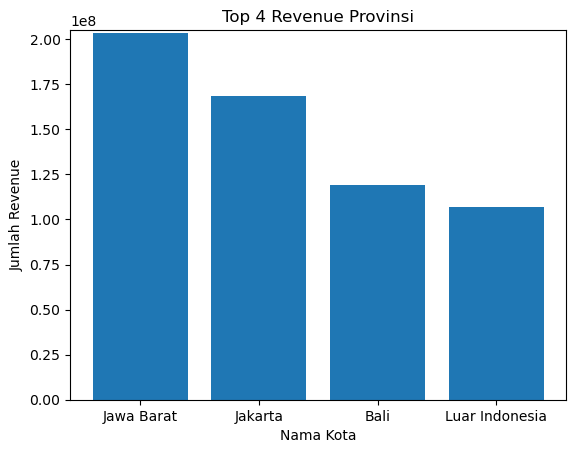

In [39]:
import matplotlib.pyplot as plt

# mengambil 5 data teratas dari kolom 'Customer'
kota_revenue = transaksi_kota.groupby(by='Domisili')['Harga_Asli'].sum().sort_values(ascending=False).head()

# membuat bar chart
plt.bar(kota_revenue.index, kota_revenue.values)

# menambahkan judul dan label sumbu
plt.title('Top 4 Revenue Provinsi')
plt.xlabel('Nama Kota')
plt.ylabel('Jumlah Revenue')
plt.ylim(0, 205000000)

# menampilkan diagram
plt.show()

In [40]:
# Total transaksi dari masing-masing (Top 4)
transaksi_kota['Domisili'].value_counts().sort_values(ascending=False).head()

Jawa Barat        146
Jakarta           115
Luar Indonesia    101
Bali               96
Name: Domisili, dtype: int64

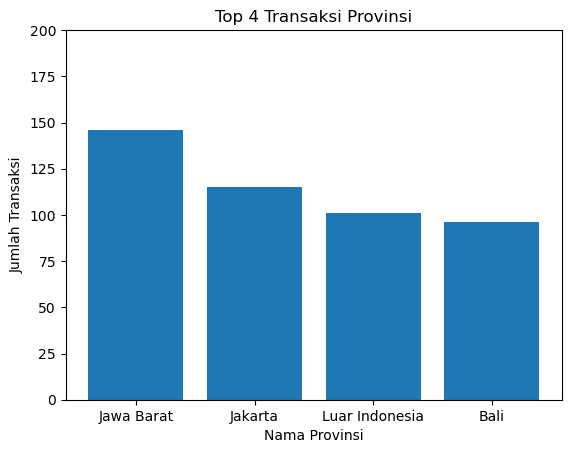

In [41]:
import matplotlib.pyplot as plt

# mengambil 5 data teratas dari kolom 'Customer'
kota_transaksi = transaksi_kota['Domisili'].value_counts().sort_values(ascending=False).head()

# membuat bar chart
plt.bar(kota_transaksi.index, kota_transaksi.values)

# menambahkan judul dan label sumbu
plt.title('Top 4 Transaksi Provinsi')
plt.xlabel('Nama Provinsi')
plt.ylabel('Jumlah Transaksi')
plt.ylim(0, 200)

# menampilkan diagram
plt.show()

#### 3. Berapa total revenue bulanan perusahaan? (produk + service)

In [42]:
df_transaksi_main.head()

,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Customer_copy,Tipe_Produk,ID_Transaksi
0,01/01/2021,Octroy,88000,Ufuoma,Ufuoma,Produk F,1
1,01/01/2021,Octroy,405000,Wiati,Wiati,Produk C,2
2,02/01/2021,Aini,405000,Cuphulien,Cuphulien,Produk A,3
3,02/01/2021,Agus,170000,Cuphulien,Cuphulien,Produk G,4
4,02/01/2021,Aini,730000,Nah,Nah,Produk D,5


In [43]:
df_transaksi_main['Tanggal_Transaksi'] = df_transaksi_main['Tanggal_Transaksi'].astype('datetime64[ns]')

c:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Acer\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '17/01/2021' in DD/MM/YYYY format. Provide format or specify in

In [44]:
revenue_bulanan = df_transaksi_main.groupby(pd.Grouper(key='Tanggal_Transaksi', freq='M')).sum()['Harga_Asli']
revenue_bulanan

Tanggal_Transaksi
2021-01-31    40225532
2021-02-28    32863312
2021-03-31    96811783
2021-04-30    98586985
2021-05-31    62409530
2021-06-30    87145749
2021-07-31    62064744
2021-08-31    34262700
2021-09-30    35899550
2021-10-31    11479600
2021-11-30     8600999
2021-12-31    27629365
Freq: M, Name: Harga_Asli, dtype: int32

In [45]:
df_transaksi_service.head()

,Tanggal_Service,Harga_Service,Customer,Tipe_Jasa,ID
0,4/1/2021,130000,Wevishar,Jasa D,1
1,4/1/2021,82000,Eniola,Jasa D,2
2,4/1/2021,79000,Chi,Jasa D,3
3,4/1/2021,70000,Moes,Jasa B,4
4,6/1/2021,70000,Mudiwa,Jasa A,5


In [46]:
df_transaksi_service['Tanggal_Service'] = df_transaksi_service['Tanggal_Service'].astype('datetime64[ns]')

In [47]:
revenue_bulanan_service = df_transaksi_service.groupby(pd.Grouper(key='Tanggal_Service', freq='M')).sum()['Harga_Service']
revenue_bulanan_service

Tanggal_Service
2021-01-31    10682500
2021-02-28    12023400
2021-03-31     5046607
2021-04-30     7327700
2021-05-31     5040100
2021-06-30     2635000
2021-07-31     2691478
2021-08-31     1286900
2021-09-30     1914270
2021-10-31     2344400
2021-11-30     2213000
2021-12-31     1175000
Freq: M, Name: Harga_Service, dtype: int32

In [48]:
# Menghitung revenue bulanan (product + service)
total_revenue_bulanan = revenue_bulanan + revenue_bulanan_service

In [49]:
total_revenue_bulanan.index

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Tanggal_Transaksi', freq='M')

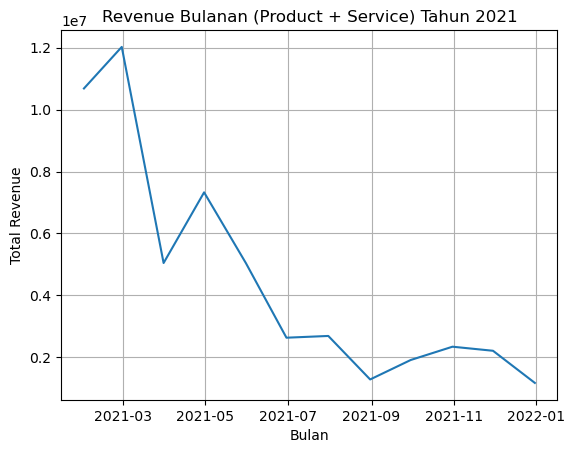

In [50]:
# membuat line chart
plt.plot(revenue_bulanan_service.index, revenue_bulanan_service.values)

# memberi judul pada chart dan sumbu-sumbunya
plt.title('Revenue Bulanan (Product + Service) Tahun 2021')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')

# menampilkan grid
plt.grid(True)

# menampilkan chart
plt.show()


#### 4. Apa produk yang paling disukai berdasarkan Gender?

In [51]:
df_produk_favorit = pd.merge(df_customer, df_transaksi_main, left_on='Name', right_on='Customer', how='right')
df_produk_favorit.head()

,Name,Domisili,Usia,Gender,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Customer_copy,Tipe_Produk,ID_Transaksi
0,Ufuoma,Bali,48,Pria,2021-01-01,Octroy,88000,Ufuoma,Ufuoma,Produk F,1
1,Wiati,Jakarta,47,Wanita,2021-01-01,Octroy,405000,Wiati,Wiati,Produk C,2
2,Cuphulien,Jawa Barat,42,Wanita,2021-02-01,Aini,405000,Cuphulien,Cuphulien,Produk A,3
3,Cuphulien,Jawa Barat,42,Wanita,2021-02-01,Agus,170000,Cuphulien,Cuphulien,Produk G,4
4,Nah,Jakarta,23,Wanita,2021-02-01,Aini,730000,Nah,Nah,Produk D,5


In [52]:
# Mencari Produk Favorit Berdasarkan Gender
df_produk_favorit.groupby(by='Gender')['Tipe_Produk'].value_counts().sort_values(ascending=False)

Gender  Tipe_Produk
Wanita  Produk D       59
        Produk E       59
        Produk B       48
        Produk G       47
        Produk F       46
        Produk C       44
        Produk A       37
Pria    Produk E       22
        Produk F       18
        Produk A       17
        Produk B       17
        Produk C       16
        Produk G       15
        Produk D       13
Name: Tipe_Produk, dtype: int64

In [53]:
# Mencari Produk Favorit Berdasarkan Usia
df_produk_favorit.groupby(by='Usia')['Tipe_Produk'].value_counts().sort_values(ascending=False)

Usia  Tipe_Produk
27    Produk E       8
23    Produk E       8
17    Produk E       7
41    Produk F       7
17    Produk A       6
                    ..
35    Produk G       1
      Produk F       1
      Produk E       1
      Produk C       1
48    Produk F       1
Name: Tipe_Produk, Length: 176, dtype: int64

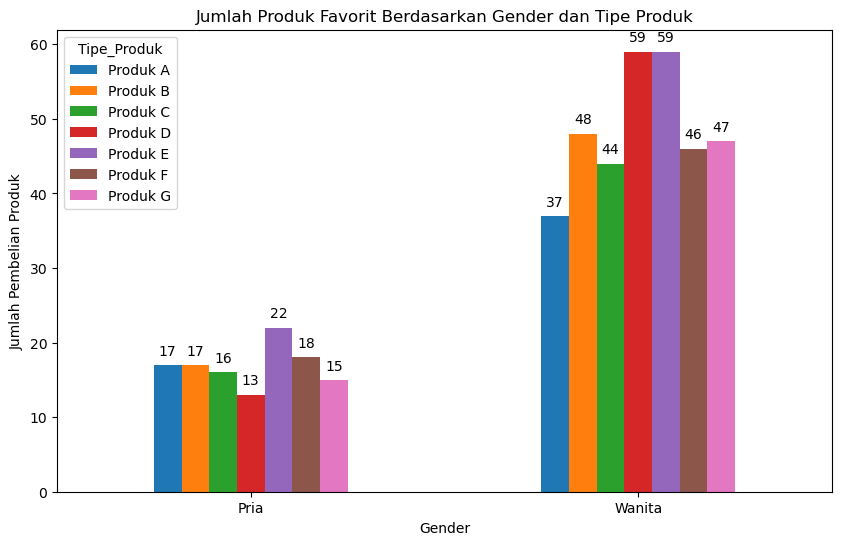

In [54]:
# Membuat pivot table dengan jumlah produk favorit berdasarkan gender dan tipe produk
pivot_table_produk_favorit = df_produk_favorit.pivot_table(index='Gender', columns='Tipe_Produk', aggfunc='size', fill_value=0)

# Membuat bar plot
ax = pivot_table_produk_favorit.plot(kind='bar', figsize=(10, 6))

# Menambahkan label pada setiap batang
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menambahkan judul dan label sumbu pada plot
plt.title('Jumlah Produk Favorit Berdasarkan Gender dan Tipe Produk')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Jumlah Pembelian Produk')

# Menampilkan plot
plt.show()

#### 5. Bagaimana kondisi demografi customer?
* Jumlah customer per domisili
* Rata-rata Usia berdasarkan gender per Domisili
* Jumlah gender per domisili

In [55]:
# Jumlah Customer Per Domisili
df_customer.groupby(by='Domisili')['Name'].count().sort_values(ascending=False)

Domisili
Jawa Barat        16
Bali              14
Jakarta           14
Luar Indonesia    11
Name: Name, dtype: int64

In [56]:
# Rata-rata usia customer per Domisili
df_customer.groupby(by='Domisili')['Usia'].mean().round()

Domisili
Bali              31.0
Jakarta           30.0
Jawa Barat        26.0
Luar Indonesia    30.0
Name: Usia, dtype: float64

In [57]:
# Customer dengan usia paling muda per Domisili
df_customer.groupby(by='Domisili')['Usia'].min()

Domisili
Bali              12
Jakarta           11
Jawa Barat        11
Luar Indonesia    18
Name: Usia, dtype: int64

In [58]:
# Customer dengan usia paling tua per Domisili
df_customer.groupby(by='Domisili')['Usia'].max()

Domisili
Bali              48
Jakarta           47
Jawa Barat        42
Luar Indonesia    41
Name: Usia, dtype: int64

In [59]:
# Median umur customer per Domisili
df_customer.groupby(by='Domisili')['Usia'].median()

Domisili
Bali              31.0
Jakarta           31.0
Jawa Barat        25.0
Luar Indonesia    30.0
Name: Usia, dtype: float64

In [60]:
# Jumlah customer berdasarkan Gender per Domisili
df_customer.groupby(by='Domisili')['Gender'].value_counts()

Domisili        Gender
Bali            Wanita    10
                Pria       4
Jakarta         Wanita    10
                Pria       4
Jawa Barat      Wanita    14
                Pria       2
Luar Indonesia  Wanita     6
                Pria       5
Name: Gender, dtype: int64

#### 6. Berapa rata-rata rating yang diberikan dari customer ke perusahaan dan masing-masing tipe produk?

In [61]:
rating_perusahaan = pd.merge(df_customer, df_review_perusahaan, on='Name', how='right')
rating_perusahaan.head()

,Name,Domisili,Usia,Gender,Rating
0,Chi,Bali,32,Pria,5
1,Dubaku,Bali,28,Pria,4
2,Taurai,Jakarta,35,Wanita,5
3,Thokozani,Luar Indonesia,36,Pria,4
4,Ufuoma,Bali,48,Pria,4


In [62]:
rating_perusahaan['Rating'].mean()

3.5454545454545454

In [63]:
rating_perusahaan.groupby(by='Domisili')['Rating'].mean().sort_values(ascending=False)

Domisili
Jawa Barat        3.750000
Jakarta           3.642857
Luar Indonesia    3.454545
Bali              3.285714
Name: Rating, dtype: float64

In [64]:
rating_perusahaan.groupby(by='Gender')['Rating'].mean()

Gender
Pria      3.533333
Wanita    3.550000
Name: Rating, dtype: float64

In [65]:
# Rating Produk
rating_produk = pd.merge(df_review_produk, df_transaksi_main, left_on='ID_Review', right_on='ID_Transaksi', how='right')
rating_produk.head()

,ID_Review,Review,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Customer_copy,Tipe_Produk,ID_Transaksi
0,1,4.0,2021-01-01,Octroy,88000,Ufuoma,Ufuoma,Produk F,1
1,2,4.0,2021-01-01,Octroy,405000,Wiati,Wiati,Produk C,2
2,3,4.0,2021-02-01,Aini,405000,Cuphulien,Cuphulien,Produk A,3
3,4,4.0,2021-02-01,Agus,170000,Cuphulien,Cuphulien,Produk G,4
4,5,5.0,2021-02-01,Aini,730000,Nah,Nah,Produk D,5


In [66]:
# Rata-rata rating dari masing-masing Tipe Produk
rating_produk.groupby(by='Tipe_Produk')['Review'].mean().sort_values(ascending=False)

Tipe_Produk
Produk C    3.716667
Produk B    3.661538
Produk D    3.638889
Produk G    3.612903
Produk F    3.531250
Produk E    3.518519
Produk A    3.481481
Name: Review, dtype: float64

#### 7. Berapa jumlah transaksi dan revenue yang didapatkan oleh perusahaan dari main product pada setiap campaign?

In [67]:
df_campaign.head()

,Name,Start_Date,End_Date,Budget
0,Campaign 1,2021-01-01,2021-01-31,10000000
1,Campaign 2,2021-01-02,2021-02-28,14000000
2,Campaign 3,2021-01-03,2021-03-31,23000000
3,Campaign 4,2021-01-04,2021-04-30,35000000
4,Campaign 5,2021-01-05,2021-05-31,36000000


In [68]:
df_transaksi_main.head()

,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Customer_copy,Tipe_Produk,ID_Transaksi
0,2021-01-01,Octroy,88000,Ufuoma,Ufuoma,Produk F,1
1,2021-01-01,Octroy,405000,Wiati,Wiati,Produk C,2
2,2021-02-01,Aini,405000,Cuphulien,Cuphulien,Produk A,3
3,2021-02-01,Agus,170000,Cuphulien,Cuphulien,Produk G,4
4,2021-02-01,Aini,730000,Nah,Nah,Produk D,5


In [69]:
# Mengubah kolom Start_Date dan Tanggal_Transaksi menjadi tipe data datetime
df_campaign['Start_Date'] = pd.to_datetime(df_campaign['Start_Date'])
df_transaksi_main['Tanggal_Transaksi'] = pd.to_datetime(df_transaksi_main['Tanggal_Transaksi'])

# Membuat kolom baru berisi bulan dan tahun saja
df_campaign['Bulan_Tahun'] = df_campaign['End_Date'].dt.strftime('%Y/%m')
df_transaksi_main['Bulan_Tahun'] = df_transaksi_main['Tanggal_Transaksi'].dt.strftime('%Y/%m')

# Menggabungkan kedua dataframe berdasarkan kolom Bulan_Tahun
campaign_main_product = pd.merge(df_campaign, df_transaksi_main, left_on='Bulan_Tahun', right_on='Bulan_Tahun', how='right')
campaign_main_product

,Name,Start_Date,End_Date,Budget,Bulan_Tahun,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Customer_copy,Tipe_Produk,ID_Transaksi
0,Campaign 1,2021-01-01,2021-01-31,10000000.0,2021/01,2021-01-01,Octroy,88000,Ufuoma,Ufuoma,Produk F,1
1,Campaign 1,2021-01-01,2021-01-31,10000000.0,2021/01,2021-01-01,Octroy,405000,Wiati,Wiati,Produk C,2
2,Campaign 2,2021-01-02,2021-02-28,14000000.0,2021/02,2021-02-01,Aini,405000,Cuphulien,Cuphulien,Produk A,3
3,Campaign 2,2021-01-02,2021-02-28,14000000.0,2021/02,2021-02-01,Agus,170000,Cuphulien,Cuphulien,Produk G,4
4,Campaign 2,2021-01-02,2021-02-28,14000000.0,2021/02,2021-02-01,Aini,730000,Nah,Nah,Produk D,5
...,...,...,...,...,...,...,...,...,...,...,...,...
453,Campaign 6,2021-01-06,2021-06-30,30000000.0,2021/06,2021-06-08,Octroy,407400,Adegoke,Adegoke,Produk A,454
454,Campaign 6,2021-01-06,2021-06-30,30000000.0,2021/06,2021-06-08,Octroy,1930000,Qayug,Qayug,Produk C,455
455,Campaign 6,2021-01-06,2021-06-30,30000000.0,2021/06,2021-06-08,Aini,1031500,Thauzhash,Thauzhash,Produk E,456
456,Campaign 7,2021-01-07,2021-07-31,37000000.0,2021/07,2021-07-08,Dena,2904000,Wevishar,Wevishar,Produk G,457


In [70]:
# Jumlah Transaksi pada setiap campaign
transaksi_main_product_campaign = campaign_main_product.groupby(by='Name')['Customer'].count()
transaksi_main_product_campaign

Name
Campaign 1    47
Campaign 2    44
Campaign 3    56
Campaign 4    61
Campaign 5    64
Campaign 6    51
Campaign 7    54
Name: Customer, dtype: int64

In [71]:
# Total revenue yang didapatkan pada setiap campaign
revenue_main_product_campaign = campaign_main_product.groupby(by='Name')['Harga_Asli'].sum()
revenue_main_product_campaign

Name
Campaign 1    40225532
Campaign 2    32863312
Campaign 3    96811783
Campaign 4    98586985
Campaign 5    62409530
Campaign 6    87145749
Campaign 7    62064744
Name: Harga_Asli, dtype: int32

## **KESIMPULAN (Berdasarkan EDA)**

**1. Top 5 Customer Paling Loyal**
* Bzayan, Mygneo, Nah, Tichaona, Ekyboo


**2. Urutan Kota Pemberi Revenue Tertinggi - Terendah**
* Jawa Barat: Rp. 203,480,015
* Jakarta   : Rp. 168,396,590
* Bali      : Rp. 119,182,433
* Luar Indonesia    : Rp. 106,920,811


**3. Total Revenue Bulanan Perusahaan (Produk + Service)**
* 2021-01    : Rp. 40,225,532
* 2021-02    : Rp. 32,863,312
* 2021-03    : Rp. 96,811,783
* 2021-04    : Rp. 98,586,985
* 2021-05    : Rp. 62,409,530
* 2021-06    : Rp. 87,145,749
* 2021-07    : Rp. 62,064,744
* 2021-08    : Rp. 34,262,700
* 2021-09    : Rp. 35,899,550
* 2021-10    : Rp. 11,479,600
* 2021-11    : Rp. 8,600,999
* 2021-12    : Rp. 27,629,365

* Berdasarkan grafik yang ada di atas, revenue perusahaan selama tahun 2021 mengalami penurunan revenue. Penurunan paling signifikan ada pada bulan Maret 2021 ke bulan April 2021
* Secara garis besar, revenue selalu menurun mulai bulan Mei 2021 hingga bulan Desember 2021


**4. Produk Favorit (Jumlah Transaksi per Produk) Berdasarkan Gender Customer**

Wanita :
- Produk D : 59
- Produk E : 59
- Produk B : 48
- Produk G : 47
- Produk F : 46
- Produk C : 44
- Produk A : 37

Pria :
- Produk E : 22
- Produk F : 18
- Produk A : 17
- Produk B : 17
- Produk C : 16
- Produk G : 15
- Produk D : 13

* Berdasarkan data dan grafik di atas, Customer dengan gender Wanita paling menyukai Tipe Produk D dan E, disusul dengan Tipe Produk B, G, F, C, dan yang paling sedikit adalah Tipe Produk A
* Untuk customer dengan gender Pria paling menyukai Tipe Produk E, dan yang paling sedikit diminati adalah Tipe Produk D


**5. Demografi Customer**

Jumlah Customer Berdasarkan Domisili:
- Jawa Barat       : 16
- Bali             : 14
- Jakarta          : 14
- Luar Indonesia   : 11

Rata-rata Usia Customer Per-Domisili:
- Bali             : 31.0
- Jakarta          : 30.0
- Jawa Barat       : 26.0
- Luar Indonesia   : 30.0

Customer dengan umur paling muda Per-Domisili:
- Bali             : 12
- Jakarta          : 11
- Jawa Barat       : 11
- Luar Indonesia   : 18

Customer dengan usia paling tua Per-Domisili:
- Bali             : 48
- Jakarta          : 47
- Jawa Barat       : 42
- Luar Indonesia   : 41

Median umur customer per-Domisili:
- Bali             : 31.0
- Jakarta          : 31.0
- Jawa Barat       : 25.0
- Luar Indonesia   : 30.0

Jumlah customer berdasarkan Gender Per-Domisili:

Bali            
- Wanita   : 10
- Pria      : 4

Jakarta    
- Wanita   : 10
- Pria      : 4

Jawa Barat      
- Wanita   : 14
- Pria      : 2

Luar Indonesia  
- Wanita   :  6
- Pria      : 5


**6. Rating Perusahaan dan Rating Produk (Skala 0.00 - 5.00)**

Rating rata-rata perusahaan yang diberikan oleh seluruh customer:
- Rata-rata rating perusahaan : 3.54

Rating rata-rata perusahaan berdasarkan Domisili:

- Jawa Barat        : 3.75
- Jakarta           : 3.64
- Luar Indonesia    : 3.45
- Bali              : 3.28

Rating rata-rata Produk per-Tipe Produk:
- Produk C    : 3.72
- Produk B    : 3.66
- Produk D    : 3.64
- Produk G    : 3.61
- Produk F    : 3.53
- Produk E    : 3.52
- Produk A    : 3.48

**7. Jumlah Transaksi dan Revenue Perusahaan pada Setiap Campaign**

Jumlah Transaksi pada setiap campaign:
- Campaign 1    : 47
- Campaign 2    : 44
- Campaign 3    : 56
- Campaign 4    : 61
- Campaign 5    : 64
- Campaign 6    : 51
- Campaign 7    : 54

Total revenue yang didapatkan pada setiap campaign:
- Campaign 1    : Rp. 40,225,532
- Campaign 2    : Rp. 32,863,312
- Campaign 3    : Rp. 96,811,783
- Campaign 4    : Rp. 98,586,985
- Campaign 5    : Rp. 62,409,530
- Campaign 6    : Rp. 87,145,749
- Campaign 7    : Rp. 62,064,744


## SARAN (Berdasarkan Kesimpulan)

1. Perusahaan dapat lebih mengoptimalkan campaign agar lebih tepat sasaran dengan cara memperhatikan demografi customer (usia, gender, dan domisili) saat melakukan Ads di sosial media, ataupun paid promote (ketahui akun yang biasa diikuti oleh customer sesuai dengan target usia, gender, dan domisili). Dengan begitu, jumlah transaksi dan revenue mungkin akan lebih mencapai hasil yang maksimal.

2. Beberapa perusahaan memilih untuk mengalokasikan anggaran marketing berdasarkan return on investment (ROI) yang diinginkan. Misalnya, jika perusahaan menginginkan ROI sebesar 3:1, perusahaan mungkin akan mengalokasikan anggaran marketing sekitar 33% dari target pendapatan mereka. Hal ini dapat diterapkan pada alokasi Budget Campaign dari Perusahaan.

3. Saat menciptakan produk, harus dilakukan survei terlebih dahulu berdasarkan kebutuhan dan tren yang sedang dibutuhkan oleh calon customer. Hal ini dapat melalui berbagai cara, seperti scraping data dari media sosial, laman berita, maupun website e-commerce. Hal ini dapat dilakukan melalui Python.

4. Untuk sosial media organic, dapat memaksimalkan konten yang menarik (sedang trending dan ada kaitannya dengan produk), copywriting (hashtag yang banyak dicari), aktif story instagram (interaktif, komunikasi dua arah dengan audience)